In [133]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

import sklearn 
from sklearn.ensemble import RandomForestRegressor

In [134]:
# Importing the dataset
dataset_orig = pd.read_csv("/home/kalyan/DataSets/NIFT-50-Stock/DRREDDY.csv")
dataset_orig.head()


,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2000-01-03,DRREDDY,EQ,1396.50,1505.0,1508.25,1505.00,1508.25,1508.25,1508.21,13280,2.002904e+12,NaN,NaN,NaN
1,2000-01-04,DRREDDY,EQ,1508.25,1590.0,1628.95,1510.00,1628.95,1628.95,1579.29,57142,9.024405e+12,NaN,NaN,NaN
2,2000-01-05,DRREDDY,EQ,1628.95,1549.0,1650.00,1499.00,1566.00,1568.05,1594.99,119697,1.909155e+13,NaN,NaN,NaN
3,2000-01-06,DRREDDY,EQ,1568.05,1599.0,1693.50,1571.00,1693.50,1661.55,1632.11,121966,1.990625e+13,NaN,NaN,NaN
4,2000-01-07,DRREDDY,EQ,1661.55,1685.0,1685.00,1528.65,1528.65,1529.10,1585.24,79641,1.262497e+13,NaN,NaN,NaN


,Date,Actual_price,Target
0,2000-01-03,1508.25,1
1,2000-01-04,1628.95,0
2,2000-01-05,1568.05,1
3,2000-01-06,1661.55,0
4,2000-01-07,1529.10,0


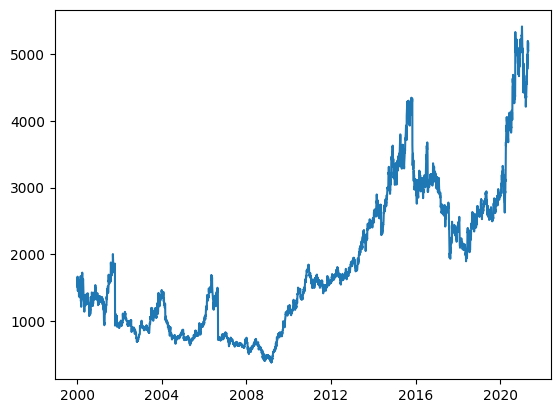

In [135]:

# Data Preprocessing

dataset = dataset_orig.copy()
dataset['Date'] = pd.to_datetime(dataset['Date'])

plt.plot(dataset['Date'],dataset['Close'])

#ensure we know the actual closing price 
dataset = dataset[['Date','Close']]
dataset = dataset.rename(columns={'Close':'Actual_price'})



#settig up our target . This identifies if the price went up or down
dataset['Target'] = np.where(dataset['Actual_price'].shift(-1) > dataset['Actual_price'], 1, 0)

dataset.head(5)

In [136]:
#shifting stock prices forward by 1 day , meaning we are predicting the price of the next day by looking at the previous day
dataset_prev = dataset_orig.copy()
dataset_prev = dataset_prev.shift(1)
dataset_prev.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2000-01-03,DRREDDY,EQ,1396.50,1505.0,1508.25,1505.0,1508.25,1508.25,1508.21,13280.0,2.002904e+12,NaN,NaN,NaN
2,2000-01-04,DRREDDY,EQ,1508.25,1590.0,1628.95,1510.0,1628.95,1628.95,1579.29,57142.0,9.024405e+12,NaN,NaN,NaN
3,2000-01-05,DRREDDY,EQ,1628.95,1549.0,1650.00,1499.0,1566.00,1568.05,1594.99,119697.0,1.909155e+13,NaN,NaN,NaN
4,2000-01-06,DRREDDY,EQ,1568.05,1599.0,1693.50,1571.0,1693.50,1661.55,1632.11,121966.0,1.990625e+13,NaN,NaN,NaN


In [137]:
#creating train data with close , volume , open,high and low prices of the previous day
dataset_train = dataset_prev.copy()
dataset_train = dataset_train.dropna()

In [138]:
dataset

,Date,Actual_price,Target
0,2000-01-03,1508.25,1
1,2000-01-04,1628.95,0
2,2000-01-05,1568.05,1
3,2000-01-06,1661.55,0
4,2000-01-07,1529.10,0
...,...,...,...
5301,2021-04-26,5066.70,0
5302,2021-04-27,5057.25,0
5303,2021-04-28,5044.45,1
5304,2021-04-29,5102.30,1


In [142]:
dataset_orig[dataset_prev,['Close','Volume','Open','High','Low']]

InvalidIndexError: (            Date   Symbol Series  Prev Close     Open     High      Low  \
0           None     None   None         NaN      NaN      NaN      NaN   
1     2000-01-03  DRREDDY     EQ     1396.50  1505.00  1508.25  1505.00   
2     2000-01-04  DRREDDY     EQ     1508.25  1590.00  1628.95  1510.00   
3     2000-01-05  DRREDDY     EQ     1628.95  1549.00  1650.00  1499.00   
4     2000-01-06  DRREDDY     EQ     1568.05  1599.00  1693.50  1571.00   
...          ...      ...    ...         ...      ...      ...      ...   
5301  2021-04-23  DRREDDY     EQ     5199.85  5228.00  5266.15  5030.10   
5302  2021-04-26  DRREDDY     EQ     5066.70  5125.00  5130.00  5030.25   
5303  2021-04-27  DRREDDY     EQ     5066.70  5090.50  5116.00  5021.35   
5304  2021-04-28  DRREDDY     EQ     5057.25  5082.55  5106.90  5030.00   
5305  2021-04-29  DRREDDY     EQ     5044.45  5070.25  5144.00  5042.30   

         Last    Close     VWAP     Volume      Turnover    Trades  \
0         NaN      NaN      NaN        NaN           NaN       NaN   
1     1508.25  1508.25  1508.21    13280.0  2.002904e+12       NaN   
2     1628.95  1628.95  1579.29    57142.0  9.024405e+12       NaN   
3     1566.00  1568.05  1594.99   119697.0  1.909155e+13       NaN   
4     1693.50  1661.55  1632.11   121966.0  1.990625e+13       NaN   
...       ...      ...      ...        ...           ...       ...   
5301  5075.00  5066.70  5120.81  2354899.0  1.205899e+15  153895.0   
5302  5067.00  5066.70  5078.16   950577.0  4.827178e+14   70675.0   
5303  5062.00  5057.25  5065.33   957835.0  4.851746e+14   64767.0   
5304  5048.00  5044.45  5065.54   843953.0  4.275075e+14   69716.0   
5305  5106.00  5102.30  5098.90  1071931.0  5.465666e+14   74199.0   

      Deliverable Volume  %Deliverble  
0                    NaN          NaN  
1                    NaN          NaN  
2                    NaN          NaN  
3                    NaN          NaN  
4                    NaN          NaN  
...                  ...          ...  
5301            400720.0       0.1702  
5302            217218.0       0.2285  
5303            260296.0       0.2718  
5304            184756.0       0.2189  
5305            211996.0       0.1978  

[5306 rows x 15 columns], ['Close', 'Volume', 'Open', 'High', 'Low'])

In [143]:
predictors = dataset_orig[['Close','Volume','Open','High','Low']]

#creating test data with close , volume , open,high and low prices of the previous day
dataset_test = dataset_orig.copy()
dataset_test = dataset_test.dropna()

dataset_test = dataset_test[['Close','Volume','Open','High','Low']]
dataset_test.head()

,Close,Volume,Open,High,Low
2850,1610.45,169533,1614.05,1620.0,1600.05
2851,1606.85,156615,1599.00,1631.0,1599.00
2852,1575.35,332804,1619.90,1619.9,1570.00
2853,1607.40,150904,1565.00,1614.4,1560.05
2854,1604.10,188032,1605.10,1619.0,1587.60


In [ ]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=1000, min_samples_split=200, random_state=1)

train = dataset_train.iloc[:-100]
test = dataset_train.iloc[-100:]

model.fit(train[['Date']], train['Target'])

RandomForestClassifier(min_samples_split=200, n_estimators=1000, random_state=1)

In [ ]:
from sklearn.metrics import precision_score

preds = model.predict(test[['Date']])
print(precision_score(test['Target'], preds))

0.54
